# Import Data

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('../Datasets/Solid_waste_audit_Vanuatu_Abundance.csv', index_col='RecordID').reset_index()
df.head()

RecordID  UniqueID  Commercial                 Date HouseholdCommercialShip_ID                      Item Material Measure  Multiplier       Site Size   Type   Value
0         1         0         1.0  11/06/2018 00:00:00                    C01_Van  Total sample weight (KG)      NaN  Weight         7.0  Port Vila  NaN  Store  13.636
1         1       517         1.0  11/06/2018 00:00:00                    C01_Van           Wet weight (KG)      NaN  Weight         7.0  Port Vila  NaN  Store   0.000
2         1      1034         1.0  11/06/2018 00:00:00                    C01_Van           Dry weight (KG)      NaN  Weight         7.0  Port Vila  NaN  Store   0.000
3         1      1551         1.0  11/06/2018 00:00:00                    C01_Van            Bags collected      NaN   Count         7.0  Port Vila  NaN  Store   1.000
4         1      2068         1.0  11/06/2018 00:00:00                    C01_Van            Aluminium cans    Metal  Weight         7.0  Port Vila  NaN  Store   0.112

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99126 entries, 0 to 99125
Data columns (total 13 columns):
RecordID                      99126 non-null int64
UniqueID                      99126 non-null int64
Commercial                    6788 non-null float64
Date                          98839 non-null object
HouseholdCommercialShip_ID    99126 non-null object
Item                          99117 non-null object
Material                      96747 non-null object
Measure                       99117 non-null object
Multiplier                    99126 non-null float64
Site                          99126 non-null object
Size                          60135 non-null object
Type                          6788 non-null object
Value                         99126 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 9.8+ MB


In [41]:
for column in df.columns:
    print(f'{column} - Value Counts:')
    print(df[column].value_counts(normalize=True, dropna=False).head(10))
    print(f'Unique values: {df[column].nunique()}')
    print('--------------------------------------')

RecordID - Value Counts:
116    0.007465
98     0.007425
78     0.007415
106    0.007405
96     0.007405
86     0.007405
90     0.007405
84     0.007405
104    0.007405
102    0.007405
Name: RecordID, dtype: float64
Unique values: 285
--------------------------------------
UniqueID - Value Counts:
0        0.00002
48229    0.00002
24424    0.00002
77168    0.00002
75121    0.00002
68395    0.00002
66346    0.00002
72489    0.00002
70440    0.00002
46180    0.00002
Name: UniqueID, dtype: float64
Unique values: 80728
--------------------------------------
Commercial - Value Counts:
NaN     0.931521
 1.0    0.068479
Name: Commercial, dtype: float64
Unique values: 1
--------------------------------------
Date - Value Counts:
11/07/2018 00:00:00    0.153360
11/09/2018 00:00:00    0.140064
15/11/2018 00:00:00    0.137421
11/08/2018 00:00:00    0.109759
11/06/2018 00:00:00    0.081159
13/11/2018 00:00:00    0.076610
22/11/2018 00:00:00    0.067540
19/11/2018 00:00:00    0.058532
20/11/2018 00

# Data Cleaning

## Drop Features

In [42]:
df = df.drop(['UniqueID',
         'Multiplier',
         'HouseholdCommercialShip_ID',
         'Size',
         'Type'], axis=1)

In [43]:
df.head()

RecordID  Commercial                 Date                      Item Material Measure       Site   Value
0         1         1.0  11/06/2018 00:00:00  Total sample weight (KG)      NaN  Weight  Port Vila  13.636
1         1         1.0  11/06/2018 00:00:00           Wet weight (KG)      NaN  Weight  Port Vila   0.000
2         1         1.0  11/06/2018 00:00:00           Dry weight (KG)      NaN  Weight  Port Vila   0.000
3         1         1.0  11/06/2018 00:00:00            Bags collected      NaN   Count  Port Vila   1.000
4         1         1.0  11/06/2018 00:00:00            Aluminium cans    Metal  Weight  Port Vila   0.112

## Remove Uncollected Items 

In [44]:
#Remove rows without a value to only leave items actually collected per household
df = df[df.Value > 0]
df = df[df.Item != 'Total sample weight (KG)']
df.Commercial = df.Commercial.fillna(0)
df = df[df['Commercial'] == 0]
print(f'There are {len(df)} records remaining in the filtered dataset')

There are 5415 records remaining in the filtered dataset


## Determine Which Measure is most Accurate 

In [45]:
for measure in df.Measure.unique():
    print(f'There are {len(df[df.Measure == measure])} rows with the measure:', measure)

There are 2051 rows with the measure: Count
There are 1912 rows with the measure: Weight
There are 1452 rows with the measure: Volume


**Okay so we see that the measure used the most is weight, this is good as it provides the kg metric that we need to do our future calculations.  The summary of this undertaking written by CEFAS explains that 'Beverage containers were sorted and counted separately', though it does not state why.  It is clear looking at the value counts below that all items with an 'ml' in them only appear a few times as they are not repeated with the measure of 'weight' or 'volume' at all.**

**For now, let's leave out 'count' and 'volume' and continue with 'weight'.**

In [46]:
df = df[df.Measure == 'Weight']
df.head()

RecordID  Commercial                 Date            Item             Material Measure       Site  Value
8149        29         0.0  11/06/2018 00:00:00  Aluminium cans                Metal  Weight  Port Vila  0.028
8155        29         0.0  11/06/2018 00:00:00      Steel cans                Metal  Weight  Port Vila  2.324
8158        29         0.0  11/06/2018 00:00:00     Metal other                Metal  Weight  Port Vila  0.140
8176        29         0.0  11/06/2018 00:00:00             LPB  Paper and cardboard  Weight  Port Vila  0.064
8179        29         0.0  11/06/2018 00:00:00           Paper  Paper and cardboard  Weight  Port Vila  0.660

## Item Feature Cleaning

## Remove Low Occurring Items (< 10)

In [47]:
df['Item'].value_counts(ascending=True, dropna=False)

End of life Vehicles                             1
Wet weight (KG)                                  1
Tyres                                            1
Wood/timber                                      1
Plastic oil containers                           1
Computer equipment                               2
Other sanitary waste                             2
Mobile phones                                    2
Medical waste                                    3
White goods                                      3
Fishing/ seafood plastic                         3
Cigarette butts                                  4
Lithium Batteries                                4
Pharmaceutical                                   5
Glass bottles win and spirt                      6
Glass fines                                      6
EPS                                              6
Used lead acid batteries                         6
Hazardous                                        6
Glass other                    

In [48]:
def items_to_drop(min_num, df):
    '''
    DocString!!!!
    '''
    drop_df = pd.DataFrame()
    
    drop_df['Items'] = df['Item'].value_counts(ascending=True, dropna=False).index
    drop_df['Count'] = df['Item'].value_counts(ascending=True, dropna=False).values
    
    drop_list = drop_df[drop_df['Count'] < min_num]['Items'].values
    
    return drop_list

In [49]:
drop_items= items_to_drop(10, df)
df['Item'] = df['Item'].map(lambda x:'drop' if x in drop_items else x)
df = df[df['Item'] != 'drop']
df['Item'].value_counts()

Flexibles/Film                                 180
Other plastic                                  162
PET bottles                                    157
Steel cans                                     156
Paper                                          126
Cardboard                                      113
Nappies                                         94
Food                                            88
Aluminium cans                                  86
LPB                                             84
Textles                                         80
Other organics                                  78
Plastic bags                                    68
HDPE bottles                                    62
Other                                           59
PP                                              56
Glass Jars                                      54
Aluminium recyclable                            41
Metal other                                     35
Feminine hygiene               

### Most Frequent Items by Weight

In [51]:
df[df.Measure == 'Weight'].groupby("Item").sum()

RecordID  Commercial     Value
Item                                                                       
Aluminium cans                                  11328         0.0    6.9320
Aluminium recyclable                             5001         0.0    2.7760
Cardboard                                       13613         0.0   41.0520
Ceramics                                         1913         0.0    6.2220
Electrical items and peripherals (incl TVs)      1897         0.0    4.5500
Feminine hygiene                                 2115         0.0    2.5580
Flexibles/Film                                  23440         0.0   50.0730
Food                                            11393         0.0  365.2610
Glass Jars                                       7504         0.0   29.5770
HDPE bottles                                     8707         0.0    7.2470
LPB                                             10035         0.0   11.8100
Metal other                                      3971         0.0   13.8966
Nappies                                         11881         0.0  501.5870
Other                                            7179         0.0   23.0080
Other organics                                  10060         0.0  311.2600
Other plastic                                   20836         0.0   34.5850
PET bottles                                     19966         0.0   52.5080
PP                                               6783         0.0    4.3210
Paper                                           15842         0.0   29.5340
Plastic bags                                     8725         0.0   12.7390
Steel cans                                      20013         0.0  118.6740
Textles                                          9404         0.0   39.5660

## Rename 'Other' Items by Material Given

In [12]:
for material in df.Material.unique():
    print(f'{material} Value Counts:')
    print(df[df['Material'] == material]['Item'].value_counts())
    print('----------------------------------')

Metal Value Counts:
Steel cans              156
Aluminium cans           86
Aluminium recyclable     41
Metal other              35
Name: Item, dtype: int64
----------------------------------
Paper and cardboard Value Counts:
Paper        126
Cardboard    113
LPB           84
Name: Item, dtype: int64
----------------------------------
Plastic Value Counts:
Flexibles/Film    180
Other plastic     162
PET bottles       157
Plastic bags       68
HDPE bottles       62
PP                 56
Name: Item, dtype: int64
----------------------------------
Glass Value Counts:
Glass Jars    54
Name: Item, dtype: int64
----------------------------------
Organics Value Counts:
Food              88
Other organics    78
Name: Item, dtype: int64
----------------------------------
Other Value Counts:
Textles     80
Other       59
Ceramics    15
Name: Item, dtype: int64
----------------------------------
Hygiene Value Counts:
Nappies             94
Feminine hygiene    17
Name: Item, dtype: int64
---------

In [13]:
# df.reset_index(drop=True, inplace=True)

# for material in df.Material.unique():
#     mat_items = df[df['Material'] == material]['Item'].value_counts().index
#     for item in mat_items.values:
#         if item == 'other':
#             mat_idxs = df[(df['Material'] == material) & (df['Item'] == item)].index
#             for idx in mat_idxs.values:
#                 df.iloc[idx, df.columns.get_loc('Item')] = f'other_{material}'
                
# for material in df.Material.unique():
#     print(f'{material} Value Counts:')
#     print(df[df.Material == material]['Item'].value_counts().head())
#     print('---------------------------------')

# Feature Engineering

## Total Weight per Household

**Now lets make a quick list showing all of the total waste collected per house ID.  This will be useful later after we have transformed the dataset to reflect one row per household.**

In [14]:
total_sample_df = pd.DataFrame()
total_sample_df['RecordID'] = df['RecordID'].sort_values().unique()
total_sample_df['Total_weight (kg)'] = df.groupby('RecordID').sum()['Value'].values
total_sample_df

RecordID  Total_weight (kg)
0          29            37.4160
1          30             7.4016
2          31            30.0840
3          32            22.8740
4          33            11.7460
5          34            20.8500
6          35            24.2440
7          36             8.5920
8          37             8.3820
9          38            21.8760
10         39            10.0340
11         40            26.1260
12         41            17.8900
13         42            18.0760
14         43            21.2300
15         44            23.5940
16         45             3.0340
17         46             7.2580
18         47            45.7960
19         48            13.2000
20         49            50.1940
21         50            11.7180
22         51            22.4780
23         52             5.5880
24         53             7.7580
25         54             7.5020
26         55            14.2440
27         56            23.1260
28         57             6.8660
29         58            10.8160
30         59            56.4020
31         60             4.0560
32         61            30.7140
33         62            12.0840
34         63             9.5280
35         64             8.0940
36         65            24.8940
37         66            12.1720
38         67            20.4900
39         68             7.9360
40         69            17.3480
41         70            11.6780
42         71            12.3200
43         72            13.5540
44         73            22.4200
45         74             1.1700
46         75            11.8180
47         76            21.1100
48         77            15.1560
49         78            17.1720
50         79             1.6850
51         80             8.1990
52         81             4.8560
53         82             1.2610
54         83             4.9460
55         84             6.1690
56         85             1.8530
57         86             1.4090
58         87             2.7730
59         88             5.6330
60         89             9.1140
61         90            10.1480
62         91            23.7010
63         92            10.3310
64         93             7.6840
65         94            27.0890
66         95             8.6560
67         96             4.1000
68         97             2.2910
69         98             0.8030
70         99             0.6390
71        100             4.9410
72        101             5.5980
73        102             7.7800
74        103             2.8560
75        104             3.9160
76        105            14.3810
77        106             7.3980
78        107            12.9240
79        108            21.8300
80        109            16.3470
81        110             7.1620
82        111            15.0920
83        112            13.1240
84        113            17.0890
85        114            17.3050
86        115            13.2730
87        116             2.0510
88        117             4.4610
89        118            12.4510
90        119             6.4600
91        120            11.5430
92        121             5.8010
93        122             7.0370
94        126             4.6920
95        127             5.3540
96        128             1.0880
97        129             0.6540
98        130             3.9440
99        131             0.2660
100       132             0.1760
101       133             1.2540
102       134             1.1220
103       135             4.6960
104       136             0.9500
105       137             0.4540
106       138             3.5840
107       139            12.0760
108       140             0.7460
109       141             3.0360
110       142             0.9720
111       143             3.0540
112       144             4.2180
113       145             4.8140
114       146             1.0080
115       147             0.5300
116       148             4.0000
117       149             0.9400
118       150             0.8440
119       151             0.4900
120       15

## Consolidate Materials for Composition Calculations

In [15]:
df_comp = df.reset_index(drop=True)
df_comp.Material.value_counts()

Plastic                685
Paper and cardboard    323
Metal                  318
Organics               166
Other                  154
Hygiene                111
Glass                   54
E-Waste                 14
Name: Material, dtype: int64

In [16]:
df_comp[df_comp['Material'] == 'Other']['Item'].value_counts()

Textles     80
Other       59
Ceramics    15
Name: Item, dtype: int64

In [17]:
# Here we are grouping 'textiles' under the paper_and_cardboard for simplicity
for idx in df_comp[df_comp['Item'] == 'Textles'].index:
    df_comp.iloc[idx, df_comp.columns.get_loc('Material')] = 'Paper and cardboard'
df_comp[df_comp['Material'] == 'Other']['Item'].value_counts()

Other       59
Ceramics    15
Name: Item, dtype: int64

In [18]:
# Here we are grouping 'ceramics' under the glass for simplicity
for idx in df_comp[df_comp['Item'] == 'Ceramics'].index:
    df_comp.iloc[idx, df_comp.columns.get_loc('Material')] = 'Glass'
df_comp[df_comp['Material'] == 'Other']['Item'].value_counts()

Other    59
Name: Item, dtype: int64

In [19]:
non_combust_list = ['Metal', 'Glass', 'E-Waste', 'Batteries', 'Other']
# Consolidate all non combustable material types into one
df_comp['Material'] = df_comp['Material'].map(lambda x: 'Non_combust' if x in non_combust_list else x)
# Here we are going to bring the 'hygiene' materials under the organics category for simplicity.
df_comp.Material = df_comp.Material.map(lambda x: 'Organics' if x == 'Hygiene' else x)
df_comp['Material'].value_counts()

Plastic                685
Non_combust            460
Paper and cardboard    403
Organics               277
Name: Material, dtype: int64

**Excellent! Now we can get a feel for the composition of each household's waste and from there generate its energy potential through the Plasma Arc Gasification process.**

In [20]:
#The only important column here is "Value", ignore the rest.
df_comp.reset_index(drop=True, inplace=True)
df_comp.groupby(['RecordID', 'Material']).sum()

Commercial    Value
RecordID Material                                
29       Non_combust                 0.0   5.3800
         Organics                    0.0  24.3960
         Paper and cardboard         0.0   5.5160
         Plastic                     0.0   2.1240
30       Non_combust                 0.0   1.1856
         Organics                    0.0   4.1520
         Paper and cardboard         0.0   0.5640
         Plastic                     0.0   1.5000
31       Non_combust                 0.0   0.2720
         Organics                    0.0  25.8360
         Paper and cardboard         0.0   1.0120
         Plastic                     0.0   2.9640
32       Non_combust                 0.0   0.3020
         Organics                    0.0  18.4280
         Paper and cardboard         0.0   1.2140
         Plastic                     0.0   2.9300
33       Non_combust                 0.0   1.2260
         Organics                    0.0   8.7160
         Paper and cardboard         0.0   0.7340
         Plastic                     0.0   1.0700
34       Non_combust                 0.0   1.2280
         Organics                    0.0  13.1500
         Paper and cardboard         0.0   2.7160
         Plastic                     0.0   3.7560
35       Non_combust                 0.0   3.6640
         Organics                    0.0  15.0320
         Paper and cardboard         0.0   3.6180
         Plastic                     0.0   1.9300
36       Non_combust                 0.0   3.7240
         Organics                    0.0   2.0400
         Paper and cardboard         0.0   0.9980
         Plastic                     0.0   1.8300
37       Non_combust                 0.0   1.1540
         Organics                    0.0   2.0620
         Paper and cardboard         0.0   3.5920
         Plastic                     0.0   1.5740
38       Non_combust                 0.0   0.0800
         Organics                    0.0  18.4960
         Paper and cardboard         0.0   1.9140
         Plastic                     0.0   1.3860
39       Non_combust                 0.0   2.4080
         Organics                    0.0   1.8140
         Paper and cardboard         0.0   4.1900
         Plastic                     0.0   1.6220
40       Non_combust                 0.0   5.7320
         Organics                    0.0  16.3800
         Paper and cardboard         0.0   0.0260
         Plastic                     0.0   3.9880
41       Non_combust                 0.0   5.7340
         Organics                    0.0  10.4720
         Paper and cardboard         0.0   0.5740
         Plastic                     0.0   1.1100
42       Non_combust                 0.0   2.7020
         Organics                    0.0  11.3440
         Paper and cardboard         0.0   2.0120
         Plastic                     0.0   2.0180
43       Non_combust                 0.0   1.5160
         Organics                    0.0  16.3600
         Paper and cardboard         0.0   0.4280
         Plastic                     0.0   2.9260
44       Non_combust                 0.0   2.5420
         Organics                    0.0  19.6440
         Paper and cardboard         0.0   0.1720
         Plastic                     0.0   1.2360
45       Non_combust                 0.0   0.9240
         Organics                    0.0   0.0980
         Paper and cardboard         0.0   1.3300
         Plastic                     0.0   0.6820
46       Organics                    0.0   6.6600
         Paper and cardboard         0.0   0.5040
         Plastic                     0.0   0.0940
47       Non_combust                 0.0   1.9820
         Organics                    0.0  41.3440
         Paper and cardboard         0.0   0.3220
         Plastic                     0.0   2.1480
48       Non_combust                 0.0   0.2800
         Organics                    0.0  11.7220
         Paper and cardboard         0.0   0.7980
         Plastic              

In [21]:
#Bring all of the composition data into a dictionary
house_comp_list = {}
for idx in df_comp.RecordID.unique():
    house_comp_list[idx] = df_comp[df_comp.RecordID == idx].groupby(['RecordID', 'Material']).sum()['Value']/df_comp[df_comp.RecordID == idx].groupby(['RecordID', 'Material']).sum()['Value'].sum()
house_comp_list

{29: RecordID  Material           
 29        Non_combust            0.143789
           Organics               0.652021
           Paper and cardboard    0.147424
           Plastic                0.056767
 Name: Value, dtype: float64, 30: RecordID  Material           
 30        Non_combust            0.160182
           Organics               0.560960
           Paper and cardboard    0.076200
           Plastic                0.202659
 Name: Value, dtype: float64, 31: RecordID  Material           
 31        Non_combust            0.009041
           Organics               0.858795
           Paper and cardboard    0.033639
           Plastic                0.098524
 Name: Value, dtype: float64, 32: RecordID  Material           
 32        Non_combust            0.013203
           Organics               0.805631
           Paper and cardboard    0.053073
           Plastic                0.128093
 Name: Value, dtype: float64, 33: RecordID  Material           
 33        Non_combus

In [22]:
# Create a new dataframe by extracting the appropriate information from above.
# This dataframe will be composed of waste type by wt %

df_comp_final = pd.DataFrame()
non_combust_list = []
organics_list = []
paper_list = []
plastic_list = []

for idx in df_comp.RecordID.sort_values().unique():
        if len(house_comp_list[idx].keys().levels[1]) == 4 and house_comp_list[idx].keys().levels[1][0] == 'Non_combust': 
            non_combust_list.append(house_comp_list[idx][0])
        elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][0] == 'Non_combust':
            non_combust_list.append(house_comp_list[idx][0])
        elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][0] == 'Non_combust':
            non_combust_list.append(house_comp_list[idx][0])
        elif len(house_comp_list[idx].keys().levels[1]) == 1 and house_comp_list[idx].keys().levels[1][0] == 'Non_combust':
            non_combust_list.append(house_comp_list[idx][0])
        else:
            non_combust_list.append(0)

for idx in df_comp.RecordID.sort_values().unique():
    if idx == 1:
        organics_list.append(house_comp_list[idx][0])
    else:
        if len(house_comp_list[idx].keys().levels[1]) == 4 and house_comp_list[idx].keys().levels[1][1] == 'Organics': 
            organics_list.append(house_comp_list[idx][1])
        elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][1] == 'Organics':
            organics_list.append(house_comp_list[idx][1])
        elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][0] == 'Organics':
            organics_list.append(house_comp_list[idx][0])
        elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][1] == 'Organics':
            organics_list.append(house_comp_list[idx][1])
        elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][0] == 'Organics':
            organics_list.append(house_comp_list[idx][0])
        elif len(house_comp_list[idx].keys().levels[1]) == 1 and house_comp_list[idx].keys().levels[1][0] == 'Organics':
            organics_list.append(house_comp_list[idx][0])
        else:
            organics_list.append(0)
        
for idx in df_comp.RecordID.sort_values().unique():
#     if idx == 1 :
#         paper_list.append(house_comp_list[idx][1][1])
#     elif idx == 2 :
#         paper_list.append(house_comp_list[idx][2][2])
#     else:
    if len(house_comp_list[idx].keys().levels[1]) == 4 and house_comp_list[idx].keys().levels[1][2] == 'Paper and cardboard':
        paper_list.append(house_comp_list[idx][2])
    elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][2] == 'Paper and cardboard':
        paper_list.append(house_comp_list[idx][2])
    elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][1] == 'Paper and cardboard':
        paper_list.append(house_comp_list[idx][1])        
    elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][1] == 'Paper and cardboard':
        paper_list.append(house_comp_list[idx][1])
    elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][0] == 'Paper and cardboard':
        paper_list.append(house_comp_list[idx][0])
    elif len(house_comp_list[idx].keys().levels[1]) == 1 and house_comp_list[idx].keys().levels[1][0] == 'Paper and cardboard':
        paper_list.append(house_comp_list[idx][0])
    else:
        paper_list.append(0)
    
for idx in df_comp.RecordID.sort_values().unique():
    if idx == 2 :
        plastic_list.append(house_comp_list[idx][2][2])
    elif idx == 3 :
        plastic_list.append(house_comp_list[idx][3][3])
    else:
        if len(house_comp_list[idx].keys().levels[1]) == 4 and house_comp_list[idx].keys().levels[1][3] == 'Plastic':
            plastic_list.append(house_comp_list[idx][3])
        elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][2] == 'Plastic':
            plastic_list.append(house_comp_list[idx][2])
        elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][1] == 'Plastic':
            plastic_list.append(house_comp_list[idx][1])
        elif len(house_comp_list[idx].keys().levels[1]) == 1 and house_comp_list[idx].keys().levels[1][0] == 'Plastic':
            plastic_list.append(house_comp_list[idx][0])
        else:
            plastic_list.append(0) 

print(organics_list[166])            
            
df_comp_final['ID'] = df_comp.RecordID.sort_values().unique()
df_comp_final['Organics_wt_%'] = organics_list
df_comp_final['Paper_and_cardboard_wt_%'] = paper_list
df_comp_final['Plastics_wt_%'] = plastic_list
df_comp_final['Non_combust_wt_%'] = non_combust_list
df_comp_final = pd.concat([df_comp_final, total_sample_df.drop('RecordID', axis=1)], axis=1)
df_comp_final

0.671957671957672


ID  Organics_wt_%  Paper_and_cardboard_wt_%  Plastics_wt_%  Non_combust_wt_%  Total_weight (kg)
0     29       0.652021                  0.147424       0.056767          0.143789            37.4160
1     30       0.560960                  0.076200       0.202659          0.160182             7.4016
2     31       0.858795                  0.033639       0.098524          0.009041            30.0840
3     32       0.805631                  0.053073       0.128093          0.013203            22.8740
4     33       0.742040                  0.062489       0.091095          0.104376            11.7460
5     34       0.630695                  0.130264       0.180144          0.058897            20.8500
6     35       0.620030                  0.149233       0.079607          0.151130            24.2440
7     36       0.237430                  0.116155       0.212989          0.433426             8.5920
8     37       0.246003                  0.428537       0.187783          0.137676             8.3820
9     38       0.845493                  0.087493       0.063357          0.003657            21.8760
10    39       0.180785                  0.417580       0.161650          0.239984            10.0340
11    40       0.626962                  0.000995       0.152645          0.219398            26.1260
12    41       0.585355                  0.032085       0.062046          0.320514            17.8900
13    42       0.627572                  0.111308       0.111640          0.149480            18.0760
14    43       0.770608                  0.020160       0.137824          0.071408            21.2300
15    44       0.832585                  0.007290       0.052386          0.107739            23.5940
16    45       0.032301                  0.438365       0.224786          0.304548             3.0340
17    46       0.917608                  0.069441       0.012951          0.000000             7.2580
18    47       0.902786                  0.007031       0.046904          0.043279            45.7960
19    48       0.888030                  0.060455       0.030303          0.021212            13.2000
20    49       0.944097                  0.002829       0.030283          0.022792            50.1940
21    50       0.871821                  0.053593       0.060249          0.014337            11.7180
22    51       0.951152                  0.025091       0.012012          0.011745            22.4780
23    52       0.003579                  0.588404       0.301718          0.106299             5.5880
24    53       0.526940                  0.246197       0.107760          0.119103             7.7580
25    54       0.429485                  0.178352       0.162890          0.229272             7.5020
26    55       0.272395                  0.368576       0.115417          0.243611            14.2440
27    56       0.926057                  0.014702       0.023696          0.035544            23.1260
28    57       0.471599                  0.299738       0.205068          0.023595             6.8660
29    58       0.711908                  0.076183       0.132951          0.078957            10.8160
30    59       0.993227                  0.000000       0.005319          0.001454            56.4020
31    60       0.008876                  0.271203       0.219428          0.500493             4.0560
32    61       0.967181                  0.002865       0.029303          0.000651            30.7140
33    62       0.556935                  0.026150       0.141013          0.275902            12.0840
34    63       0.602015                  0.230688       0.031906          0.135390             9.5280
35    64       0.133432                  0.137386       0.471460          0.257722             8.0940
36    65       0.800032                  0.077930       0.060818          0.061220            24.8940
37    66       0.567696                  0.141144       0.171706          0.119454            12.1720
38    67       0.689019     

In [23]:
df_comp_final['Sum_check'] = df_comp_final['Organics_wt_%'] + df_comp_final['Paper_and_cardboard_wt_%'] + df_comp_final['Plastics_wt_%'] + df_comp_final['Non_combust_wt_%']
df_comp_final[df_comp_final['Sum_check'] < .99]
df_comp_final.drop('Sum_check', axis=1, inplace=True)

In [24]:
# # Excelllent, now we create a function to calculate the potential energy (kWh)
# # per kg of waste based off of the above MSW composition dataframe!
# def kWh_energy_conversion(organics, paper, plastics):
#     organics_form = (34.91*.73) + (117.83*.115) - (10.34*.148) - (1.51*.0004) + (10.05*.001) - (2.11*.0002)
#     paper_form = (34.91*.433) + (117.83*.058) - (10.34*.443) - (1.51*.0003) + (10.05*.0002) - (2.11*.06)
#     plastics_form = (34.91*.60) + (117.83*.072) - (10.34*.228) - (1.51*0) + (10.05*0) - (2.11*.1)
    
#     organics_total = (organics_form*organics)
#     paper_total = (paper_form*paper)
#     plastics_total = (plastics_form*plastics)
   
#     energy_mj_per_kg = organics_total + paper_total + plastics_total

#     #Now we are going to change from Mj/kg to kWh/kg for relatability.
#     energy_kWh_per_kg = energy_mj_per_kg * 0.2778
    
#     return energy_kWh_per_kg

In [25]:
# Excelllent, now we create a function to calculate the potential energy (kWh)
# per kg of waste based off of the above MSW composition dataframe!
def kWh_energy_conversion(organics, paper, plastics):
    hhv_organics_form = (34.91*.73) + (117.83*.115) - (10.34*.148) - (1.51*.004) + (10.05*.001) - (2.11*.002)
    hhv_paper_form = (34.91*.433) + (117.83*.058) - (10.34*.443) - (1.51*.003) + (10.05*.002) - (2.11*.06)
    hhv_plastics_form = (34.91*.60) + (117.83*.072) - (10.34*.228) - (1.51*0) + (10.05*0) - (2.11*.1)
    
    lhv_organics_total = (hhv_organics_form - (0.212*.115) - (0.0008*(.148+.004))) 
    lhv_paper_total = (hhv_paper_form - (0.212*.058) - (0.0008*(.148+.000)))
    lhv_plastics_total = (hhv_plastics_form - (0.212*.072) - (0.0008*(.148+0)))
                          
    nhv_organics_total = (lhv_organics_total * ((100-70)/100)) - (0.0245*0.70)
    nhv_paper_total = (lhv_paper_total * ((100-10.2)/100)) - (0.0245*0.102)
    nhv_plastics_total = (lhv_plastics_total * ((100-0.2)/100)) - (0.0245*0.002)
#     *organics)                      
                          
    nhv_organics_total = nhv_organics_total * organics
    nhv_paper_total = nhv_organics_total * paper
    nhv_plastics_total = nhv_organics_total * plastics

    energy_mj_per_kg = nhv_organics_total + nhv_paper_total + nhv_plastics_total

    #Now we are going to change from Mj/kg to kWh/kg for relatability.
    energy_kWh_per_kg = energy_mj_per_kg * 0.2778
    
    return energy_kWh_per_kg

In [26]:
# Since the above function takes the wt% values when making its calculation
# we do not need to worry about including the non_combust feature in either
# of these cells. Their impact will be treated as contributing 0 energy based on
# their respective wt% as well

df_comp_final['energy_kWh_per_kg'] = round(kWh_energy_conversion(
                                df_comp_final['Organics_wt_%'],
                                df_comp_final['Paper_and_cardboard_wt_%'],
                                df_comp_final['Plastics_wt_%']), 2)
df_comp_final.head(25)

ID  Organics_wt_%  Paper_and_cardboard_wt_%  Plastics_wt_%  Non_combust_wt_%  Total_weight (kg)  energy_kWh_per_kg
0   29       0.652021                  0.147424       0.056767          0.143789            37.4160               2.45
1   30       0.560960                  0.076200       0.202659          0.160182             7.4016               2.24
2   31       0.858795                  0.033639       0.098524          0.009041            30.0840               3.03
3   32       0.805631                  0.053073       0.128093          0.013203            22.8740               2.97
4   33       0.742040                  0.062489       0.091095          0.104376            11.7460               2.67
5   34       0.630695                  0.130264       0.180144          0.058897            20.8500               2.58
6   35       0.620030                  0.149233       0.079607          0.151130            24.2440               2.38
7   36       0.237430                  0.116155       0.212989          0.433426             8.5920               0.98
8   37       0.246003                  0.428537       0.187783          0.137676             8.3820               1.24
9   38       0.845493                  0.087493       0.063357          0.003657            21.8760               3.03
10  39       0.180785                  0.417580       0.161650          0.239984            10.0340               0.89
11  40       0.626962                  0.000995       0.152645          0.219398            26.1260               2.26
12  41       0.585355                  0.032085       0.062046          0.320514            17.8900               2.00
13  42       0.627572                  0.111308       0.111640          0.149480            18.0760               2.39
14  43       0.770608                  0.020160       0.137824          0.071408            21.2300               2.78
15  44       0.832585                  0.007290       0.052386          0.107739            23.5940               2.75
16  45       0.032301                  0.438365       0.224786          0.304548             3.0340               0.17
17  46       0.917608                  0.069441       0.012951          0.000000             7.2580               3.10
18  47       0.902786                  0.007031       0.046904          0.043279            45.7960               2.97
19  48       0.888030                  0.060455       0.030303          0.021212            13.2000               3.02
20  49       0.944097                  0.002829       0.030283          0.022792            50.1940               3.04
21  50       0.871821                  0.053593       0.060249          0.014337            11.7180               3.03
22  51       0.951152                  0.025091       0.012012          0.011745            22.4780               3.08
23  52       0.003579                  0.588404       0.301718          0.106299             5.5880               0.02
24  53       0.526940                  0.246197       0.107760          0.119103             7.7580               2.23

In [27]:
# Finally, we are going to calculate the specific amount of energy that each 
# household created based on the amount of trash that was available for pickup
# that day.
df_comp_final['total_energy_kWh'] = round(df_comp_final['energy_kWh_per_kg'] * df_comp_final['Total_weight (kg)'], 2)
df_comp_final.head()

ID  Organics_wt_%  Paper_and_cardboard_wt_%  Plastics_wt_%  Non_combust_wt_%  Total_weight (kg)  energy_kWh_per_kg  total_energy_kWh
0  29       0.652021                  0.147424       0.056767          0.143789            37.4160               2.45             91.67
1  30       0.560960                  0.076200       0.202659          0.160182             7.4016               2.24             16.58
2  31       0.858795                  0.033639       0.098524          0.009041            30.0840               3.03             91.15
3  32       0.805631                  0.053073       0.128093          0.013203            22.8740               2.97             67.94
4  33       0.742040                  0.062489       0.091095          0.104376            11.7460               2.67             31.36

In [28]:
df_comp_final.describe()

ID  Organics_wt_%  Paper_and_cardboard_wt_%  Plastics_wt_%  Non_combust_wt_%  Total_weight (kg)  energy_kWh_per_kg  total_energy_kWh
count  204.000000     204.000000                204.000000     204.000000        204.000000         204.000000         204.000000        204.000000
mean   132.264706       0.524126                  0.100271       0.174275          0.201328           8.184983           1.884804         20.153186
std     60.601245       0.346658                  0.133629       0.180728          0.232789           9.112322           1.158808         27.902189
min     29.000000       0.000000                  0.000000       0.000000          0.000000           0.056000           0.000000          0.000000
25%     79.750000       0.227208                  0.007225       0.046747          0.023505           1.841750           0.972500          1.785000
50%    133.500000       0.607870                  0.054760       0.125908          0.119279           4.898500           2.320000          9.195000
75%    184.250000       0.846405                  0.119520       0.230635          0.282650          11.626750           2.920000         28.360000
max    250.000000       1.000000                  0.667831       0.860902          0.998243          56.402000           3.120000        175.410000

## Create Custom Dummy Variables with Weight Values

In [29]:
df.Item.value_counts()

Flexibles/Film                                 180
Other plastic                                  162
PET bottles                                    157
Steel cans                                     156
Paper                                          126
Cardboard                                      113
Nappies                                         94
Food                                            88
Aluminium cans                                  86
LPB                                             84
Textles                                         80
Other organics                                  78
Plastic bags                                    68
HDPE bottles                                    62
Other                                           59
PP                                              56
Glass Jars                                      54
Aluminium recyclable                            41
Metal other                                     35
Feminine hygiene               

In [30]:
# Here we change the shape of our dataframe to prepare it for modeling.
for item in df.Item.unique():
    df[item] = df[df.Item == item]['Value']
dummy_df = df.groupby('RecordID').mean().drop('Value', axis=1).fillna(0).reset_index()
  
for column in dummy_df.columns:
    if column == 'RecordID':
        dummy_df = dummy_df.rename(columns={column:'ID'})
    else:
        dummy_df = dummy_df.rename(columns={column:column.lower()})
    
dummy_df.head()

ID  commercial  aluminium cans  steel cans  metal other    lpb  paper  pet bottles  plastic bags  flexibles/film  other plastic  glass jars  other organics  textles  ceramics  other  aluminium recyclable  cardboard  nappies    food  hdpe bottles     pp  feminine hygiene  electrical items and peripherals (incl tvs)
0  29         0.0           0.028       2.324       0.1400  0.064  0.660        0.392         0.172           0.312          1.248       0.244          24.396    4.792     0.576  2.068                 0.000      0.000    0.000   0.000         0.000  0.000             0.000                                          0.0
1  30         0.0           0.000       0.408       0.0316  0.000  0.000        0.844         0.156           0.000          0.500       0.332           0.000    0.000     0.000  0.306                 0.108      0.564    0.088   4.064         0.000  0.000             0.000                                          0.0
2  31         0.0           0.052       0.000       0.0000  0.232  0.672        1.484         0.000           0.780          0.460       0.000           0.000    0.064     0.000  0.128                 0.092      0.044   13.876  11.892         0.060  0.180             0.068                                          0.0
3  32         0.0           0.000       0.302       0.0000  0.202  0.192        0.884         0.670           1.084          0.256       0.000           0.000    0.820     0.000  0.000                 0.000      0.000    4.792  13.636         0.000  0.036             0.000                                          0.0
4  33         0.0           0.032       1.120       0.0000  0.000  0.060        0.168         0.156           0.256          0.368       0.000           0.000    0.200     0.030  0.000                 0.044      0.474    8.220   0.496         0.122  0.000             0.000                                          0.0

In [31]:
for column in dummy_df.columns:
    print(f'{column} Value Counts:')
    print(dummy_df[column].value_counts(normalize=True, dropna=False).head())
    print('------------------------------')

ID Value Counts:
250    0.004902
92     0.004902
102    0.004902
101    0.004902
100    0.004902
Name: ID, dtype: float64
------------------------------
commercial Value Counts:
0.0    1.0
Name: commercial, dtype: float64
------------------------------
aluminium cans Value Counts:
0.000    0.578431
0.013    0.029412
0.030    0.024510
0.032    0.014706
0.056    0.014706
Name: aluminium cans, dtype: float64
------------------------------
steel cans Value Counts:
0.000    0.235294
0.092    0.014706
0.126    0.014706
0.076    0.014706
0.082    0.009804
Name: steel cans, dtype: float64
------------------------------
metal other Value Counts:
0.000    0.828431
0.099    0.004902
0.379    0.004902
0.086    0.004902
0.496    0.004902
Name: metal other, dtype: float64
------------------------------
lpb Value Counts:
0.000    0.588235
0.064    0.019608
0.024    0.019608
0.026    0.014706
0.100    0.009804
Name: lpb, dtype: float64
------------------------------
paper Value Counts:
0.000    0.3823

# Create EDA DataFrame

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [33]:
df_comp

RecordID  Commercial                 Date                                         Item             Material Measure         Site    Value
0           29         0.0  11/06/2018 00:00:00                               Aluminium cans          Non_combust  Weight    Port Vila   0.0280
1           29         0.0  11/06/2018 00:00:00                                   Steel cans          Non_combust  Weight    Port Vila   2.3240
2           29         0.0  11/06/2018 00:00:00                                  Metal other          Non_combust  Weight    Port Vila   0.1400
3           29         0.0  11/06/2018 00:00:00                                          LPB  Paper and cardboard  Weight    Port Vila   0.0640
4           29         0.0  11/06/2018 00:00:00                                        Paper  Paper and cardboard  Weight    Port Vila   0.6600
5           29         0.0  11/06/2018 00:00:00                                  PET bottles              Plastic  Weight    Port Vila   0.3920
6           29         0.0  11/06/2018 00:00:00                                 Plastic bags              Plastic  Weight    Port Vila   0.1720
7           29         0.0  11/06/2018 00:00:00                               Flexibles/Film              Plastic  Weight    Port Vila   0.3120
8           29         0.0  11/06/2018 00:00:00                                Other plastic              Plastic  Weight    Port Vila   1.2480
9           29         0.0  11/06/2018 00:00:00                                   Glass Jars          Non_combust  Weight    Port Vila   0.2440
10          29         0.0  11/06/2018 00:00:00                               Other organics             Organics  Weight    Port Vila  24.3960
11          29         0.0  11/06/2018 00:00:00                                      Textles  Paper and cardboard  Weight    Port Vila   4.7920
12          29         0.0  11/06/2018 00:00:00                                     Ceramics          Non_combust  Weight    Port Vila   0.5760
13          29         0.0  11/06/2018 00:00:00                                        Other          Non_combust  Weight    Port Vila   2.0680
14          30         0.0  11/06/2018 00:00:00                         Aluminium recyclable          Non_combust  Weight    Port Vila   0.1080
15          30         0.0  11/06/2018 00:00:00                                   Steel cans          Non_combust  Weight    Port Vila   0.4080
16          30         0.0  11/06/2018 00:00:00                                  Metal other          Non_combust  Weight    Port Vila   0.0316
17          30         0.0  11/06/2018 00:00:00                                    Cardboard  Paper and cardboard  Weight    Port Vila   0.5640
18          30         0.0  11/06/2018 00:00:00                                  PET bottles              Plastic  Weight    Port Vila   0.8440
19          30         0.0  11/06/2018 00:00:00                                 Plastic bags              Plastic  Weight    Port Vila   0.1560
20          30         0.0  11/06/2018 00:00:00                                Other plastic              Plastic  Weight    Port Vila   0.5000
21          30         0.0  11/06/2018 00:00:00                                   Glass Jars          Non_combust  Weight    Port Vila   0.3320
22          30         0.0  11/06/2018 00:00:00                                      Nappies             Organics  Weight    Port Vila   0.0880
23          30         0.0  11/06/2018 00:00:00                                         Food             Organics  Weight    Port Vila   4.0640
24          30         0.0  11/06/2018 00:00:00                                        Other          Non_combust  Weight    Port Vila   0.3060
25          31         0.0  11/06/2018 00:00:00                               Aluminium cans          Non_combust  Weight    Port Vila   0.0520
26          31         0.0  11/06/2018 00:00:00                         Aluminium recyclable          Non_combust  Wei

In [34]:
eda_model = pd.DataFrame()

df_comp['Date'] = df_comp['Date'].map(lambda x: x[:8])
df_comp['Date'] = pd.to_datetime(df_comp['Date'])
date = []
premises_type = []
locations = []
area_type = []
frequency = []

In [35]:
for idx in df_comp.RecordID.sort_values().unique():
    date.append(df_comp[df_comp.RecordID == idx]['Date'].unique()[0])
    premises_type.append(df_comp[df_comp.RecordID == idx]['Commercial'].unique().item())
    locations.append(df_comp[df_comp.RecordID == idx]['Site'].unique().item())
#     area_type.append(df_comp[df_comp.ID == idx]['Type'].unique().item())
#     frequency.append(df_comp[df_comp.ID == idx]['Collection_frequency'].unique().item())

eda_model['Date'] = date
eda_model['Commercial'] = premises_type
eda_model['Location'] = locations
# eda_model['Type'] = area_type
# eda_model['Collection_frequency'] = frequency



eda_model = pd.concat([df_comp_final,
                       eda_model['Date'],
                       eda_model['Commercial'],
                       eda_model['Location'],
#                        eda_model['Type'],
#                        eda_model['Collection_frequency'],
                       dummy_df.drop('ID', axis=1)],
                       axis=1)
eda_model.to_csv('../Datasets/Vanuatu - EDA_DataFrame.csv')
eda_model.head()

ID  Organics_wt_%  Paper_and_cardboard_wt_%  Plastics_wt_%  Non_combust_wt_%  Total_weight (kg)  energy_kWh_per_kg  total_energy_kWh       Date  Commercial   Location  commercial  aluminium cans  steel cans  metal other    lpb  paper  pet bottles  plastic bags  flexibles/film  other plastic  glass jars  other organics  textles  ceramics  other  aluminium recyclable  cardboard  nappies    food  hdpe bottles     pp  feminine hygiene  electrical items and peripherals (incl tvs)
0  29       0.652021                  0.147424       0.056767          0.143789            37.4160               2.45             91.67 2020-11-06         0.0  Port Vila         0.0           0.028       2.324       0.1400  0.064  0.660        0.392         0.172           0.312          1.248       0.244          24.396    4.792     0.576  2.068                 0.000      0.000    0.000   0.000         0.000  0.000             0.000                                          0.0
1  30       0.560960                  0.076200       0.202659          0.160182             7.4016               2.24             16.58 2020-11-06         0.0  Port Vila         0.0           0.000       0.408       0.0316  0.000  0.000        0.844         0.156           0.000          0.500       0.332           0.000    0.000     0.000  0.306                 0.108      0.564    0.088   4.064         0.000  0.000             0.000                                          0.0
2  31       0.858795                  0.033639       0.098524          0.009041            30.0840               3.03             91.15 2020-11-06         0.0  Port Vila         0.0           0.052       0.000       0.0000  0.232  0.672        1.484         0.000           0.780          0.460       0.000           0.000    0.064     0.000  0.128                 0.092      0.044   13.876  11.892         0.060  0.180             0.068                                          0.0
3  32       0.805631                  0.053073       0.128093          0.013203            22.8740               2.97             67.94 2020-11-07         0.0  Port Vila         0.0           0.000       0.302       0.0000  0.202  0.192        0.884         0.670           1.084          0.256       0.000           0.000    0.820     0.000  0.000                 0.000      0.000    4.792  13.636         0.000  0.036             0.000                                          0.0
4  33       0.742040                  0.062489       0.091095          0.104376            11.7460               2.67             31.36 2020-11-07         0.0  Port Vila         0.0           0.032       1.120       0.0000  0.000  0.060        0.168         0.156           0.256          0.368       0.000           0.000    0.200     0.030  0.000                 0.044      0.474    8.220   0.496         0.122  0.000             0.000                                          0.0

# Modeling

In [401]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

np.random.seed(123)

In [402]:
def item_cleaner(item, chars_to_replace, replacement):
    for idx, char in enumerate(chars_to_replace):
        item = item.replace(char, replacement[idx])
    return item

chars_to_replace = [' ',
                    '/',
                    'metal_other',
                    'other_other',
                    'other_batteries',
                    'other_glass_glass',
                    'textles',
                    'glass_jars',
                    'drinking_water_plastic_bags']

replacement = ['_',
               '_',
               'other_metal',
               'other',
               'batteries',
               'other_glass',
               'textiles',
               'jars',
               'drinkbags']

## Create Model & Train/Test Split

In [403]:
model_df = pd.concat([df_comp_final, dummy_df.drop(['ID', 'commercial'], axis=1)], axis=1)
model_df.columns = [item_cleaner(x, chars_to_replace, replacement) for x in model_df.columns]

model_df.to_csv('Vanuatu Final Model.csv')
model_df.head()

ID  Organics_wt_%  Paper_and_cardboard_wt_%  Plastics_wt_%  Non_combust_wt_%  Total_weight_(kg)  energy_kWh_per_kg  total_energy_kWh  aluminium_cans  steel_cans  other_metal    lpb  paper  pet_bottles  plastic_bags  flexibles_film  other_plastic   jars  other_organics  textiles  ceramics  other  aluminium_recyclable  cardboard  nappies    food  hdpe_bottles     pp  feminine_hygiene  electrical_items_and_peripherals_(incl_tvs)
0  29       0.652021                  0.147424       0.056767          0.143789            37.4160               2.45             91.67           0.028       2.324       0.1400  0.064  0.660        0.392         0.172           0.312          1.248  0.244          24.396     4.792     0.576  2.068                 0.000      0.000    0.000   0.000         0.000  0.000             0.000                                          0.0
1  30       0.560960                  0.076200       0.202659          0.160182             7.4016               2.24             16.58           0.000       0.408       0.0316  0.000  0.000        0.844         0.156           0.000          0.500  0.332           0.000     0.000     0.000  0.306                 0.108      0.564    0.088   4.064         0.000  0.000             0.000                                          0.0
2  31       0.858795                  0.033639       0.098524          0.009041            30.0840               3.03             91.15           0.052       0.000       0.0000  0.232  0.672        1.484         0.000           0.780          0.460  0.000           0.000     0.064     0.000  0.128                 0.092      0.044   13.876  11.892         0.060  0.180             0.068                                          0.0
3  32       0.805631                  0.053073       0.128093          0.013203            22.8740               2.97             67.94           0.000       0.302       0.0000  0.202  0.192        0.884         0.670           1.084          0.256  0.000           0.000     0.820     0.000  0.000                 0.000      0.000    4.792  13.636         0.000  0.036             0.000                                          0.0
4  33       0.742040                  0.062489       0.091095          0.104376            11.7460               2.67             31.36           0.032       1.120       0.0000  0.000  0.060        0.168         0.156           0.256          0.368  0.000           0.000     0.200     0.030  0.000                 0.044      0.474    8.220   0.496         0.122  0.000             0.000                                          0.0

## Remove Outliers

In [404]:
model_df.describe()

ID  Organics_wt_%  Paper_and_cardboard_wt_%  Plastics_wt_%  Non_combust_wt_%  Total_weight_(kg)  energy_kWh_per_kg  total_energy_kWh  aluminium_cans  steel_cans  other_metal         lpb       paper  pet_bottles  plastic_bags  flexibles_film  other_plastic        jars  other_organics    textiles    ceramics       other  aluminium_recyclable   cardboard     nappies        food  hdpe_bottles          pp  feminine_hygiene  electrical_items_and_peripherals_(incl_tvs)
count  204.000000     204.000000                204.000000     204.000000        204.000000         204.000000         204.000000        204.000000       204.00000  204.000000   204.000000  204.000000  204.000000   204.000000    204.000000      204.000000     204.000000  204.000000      204.000000  204.000000  204.000000  204.000000            204.000000  204.000000  204.000000  204.000000    204.000000  204.000000        204.000000                                   204.000000
mean   132.264706       0.524126                  0.100271       0.174275          0.201328           8.184983           1.884804         20.153186         0.03398    0.581735     0.068121    0.057892    0.144775     0.257392      0.062446        0.245456       0.169534    0.144985        1.525784    0.193951    0.030500    0.112784              0.013608    0.201235    2.458760    1.790495      0.035525    0.021181          0.012539                                     0.022304
std     60.601245       0.346658                  0.133629       0.180728          0.232789           9.112322           1.158808         27.902189         0.07916    0.889879     0.338109    0.158435    0.262609     0.442615      0.180676        0.338167       0.263677    0.337170        5.299995    0.571528    0.131288    0.284232              0.055900    0.366750    5.155228    3.701876      0.105111    0.143768          0.083175                                     0.116181
min     29.000000       0.000000                  0.000000       0.000000          0.000000           0.056000           0.000000          0.000000         0.00000    0.000000     0.000000    0.000000    0.000000     0.000000      0.000000        0.000000       0.000000    0.000000        0.000000    0.000000    0.000000    0.000000              0.000000    0.000000    0.000000    0.000000      0.000000    0.000000          0.000000                                     0.000000
25%     79.750000       0.227208                  0.007225       0.046747          0.023505           1.841750           0.972500          1.785000         0.00000    0.018000     0.000000    0.000000    0.000000     0.021250      0.000000        0.039500       0.008750    0.000000        0.000000    0.000000    0.000000    0.000000              0.000000    0.000000    0.000000    0.000000      0.000000    0.000000          0.000000                                     0.000000
50%    133.500000       0.607870                  0.054760       0.125908          0.119279           4.898500           2.320000          9.195000         0.00000    0.291500     0.000000    0.000000    0.030500     0.116000      0.000000        0.126000       0.064000    0.000000        0.000000    0.000000    0.000000    0.000000              0.000000    0.025000    0.000000    0.000000      0.000000    0.000000          0.000000                                     0.000000
75%    184.250000       0.846405                  0.119520       0.230635          0.282650          11.626750           2.920000         28.360000         0.03000    0.744500     0.000000    0.052750    0.175750     0.250000      0.036500        0.339500       0.196250    0.136500        0.338000    0.081000    0.000000    0.049250              0.000000    0.208500    2.643500    1.664500      0.024000    0.003500          0.000000                                     0.000000
max    250.000000       1.000000                  0.667831       0.860902          0.998243          56.402000           3.120000        175.410000         0.5

### Total Weight (kg)

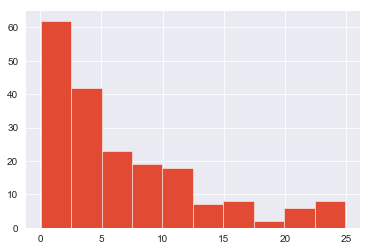

In [405]:
model_df[model_df['Total_weight_(kg)'] < 25]['Total_weight_(kg)'].hist();

In [406]:
print('Old length:', len(model_df))
print('New length:', len(model_df[model_df['Total_weight_(kg)'] < 25]))
model_df = model_df[model_df['Total_weight_(kg)'] < 25]
model_df.describe()

Old length: 204
New length: 195


ID  Organics_wt_%  Paper_and_cardboard_wt_%  Plastics_wt_%  Non_combust_wt_%  Total_weight_(kg)  energy_kWh_per_kg  total_energy_kWh  aluminium_cans  steel_cans  other_metal         lpb       paper  pet_bottles  plastic_bags  flexibles_film  other_plastic        jars  other_organics    textiles    ceramics       other  aluminium_recyclable   cardboard     nappies        food  hdpe_bottles          pp  feminine_hygiene  electrical_items_and_peripherals_(incl_tvs)
count  195.000000     195.000000                195.000000     195.000000        195.000000         195.000000         195.000000        195.000000      195.000000  195.000000   195.000000  195.000000  195.000000   195.000000    195.000000      195.000000     195.000000  195.000000      195.000000  195.000000  195.000000  195.000000            195.000000  195.000000  195.000000  195.000000    195.000000  195.000000        195.000000                                   195.000000
mean   134.984615       0.507841                  0.103891       0.179931          0.208337           6.816234           1.837487         15.954974        0.032195    0.563313     0.066434    0.058308    0.144359     0.253138      0.048846        0.238862       0.161954    0.150426        0.975641    0.176349    0.026503    0.106728              0.013764    0.209733    1.904600    1.605349      0.036446    0.010938          0.012769                                     0.019579
std     58.971903       0.344787                  0.135243       0.182634          0.235226           6.279427           1.161830         18.884514        0.072728    0.857235     0.343871    0.161352    0.262060     0.441542      0.145942        0.340508       0.253240    0.343526        2.903963    0.480804    0.124179    0.253639              0.056836    0.372882    3.693071    3.231965      0.107244    0.032074          0.084951                                     0.107238
min     30.000000       0.000000                  0.000000       0.000000          0.000000           0.056000           0.000000          0.000000        0.000000    0.000000     0.000000    0.000000    0.000000     0.000000      0.000000        0.000000       0.000000    0.000000        0.000000    0.000000    0.000000    0.000000              0.000000    0.000000    0.000000    0.000000      0.000000    0.000000          0.000000                                     0.000000
25%     84.500000       0.200792                  0.011489       0.051088          0.026585           1.775000           0.840000          1.670000        0.000000    0.022500     0.000000    0.000000    0.000000     0.020500      0.000000        0.038000       0.009500    0.000000        0.000000    0.000000    0.000000    0.000000              0.000000    0.000000    0.000000    0.000000      0.000000    0.000000          0.000000                                     0.000000
50%    137.000000       0.585355                  0.058020       0.130408          0.128674           4.692000           2.250000          8.830000        0.000000    0.296000     0.000000    0.000000    0.034000     0.112000      0.000000        0.124000       0.062000    0.000000        0.000000    0.000000    0.000000    0.000000              0.000000    0.028000    0.000000    0.000000      0.000000    0.000000          0.000000                                     0.000000
75%    185.500000       0.831642                  0.126575       0.247257          0.309004           9.781000           2.900000         23.705000        0.030000    0.740000     0.000000    0.052000    0.176500     0.245000      0.030500        0.334000       0.184500    0.150500        0.284000    0.086000    0.000000    0.049500              0.000000    0.255000    2.169000    1.629000      0.024000    0.004000          0.000000                                     0.000000
max    249.000000       1.000000                  0.667831       0.860902          0.998243          24.894000           3.120000         73.240000        0.54

### Total Energy kWh > 0

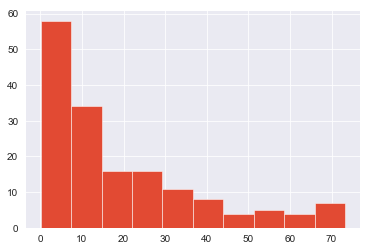

In [407]:
model_df[model_df['total_energy_kWh'] > 0]['total_energy_kWh'].hist();

In [408]:
print('Old length:', len(model_df))
print('New length:', len(model_df[model_df['total_energy_kWh'] > 0]))
model_df = model_df[model_df['total_energy_kWh'] > 0]
model_df.describe()

Old length: 195
New length: 163


ID  Organics_wt_%  Paper_and_cardboard_wt_%  Plastics_wt_%  Non_combust_wt_%  Total_weight_(kg)  energy_kWh_per_kg  total_energy_kWh  aluminium_cans  steel_cans  other_metal         lpb       paper  pet_bottles  plastic_bags  flexibles_film  other_plastic        jars  other_organics    textiles    ceramics       other  aluminium_recyclable   cardboard     nappies        food  hdpe_bottles          pp  feminine_hygiene  electrical_items_and_peripherals_(incl_tvs)
count  163.000000     163.000000                163.000000     163.000000        163.000000         163.000000         163.000000        163.000000      163.000000  163.000000   163.000000  163.000000  163.000000   163.000000    163.000000      163.000000     163.000000  163.000000      163.000000  163.000000  163.000000  163.000000            163.000000  163.000000  163.000000  163.000000    163.000000  163.000000        163.000000                                   163.000000
mean   131.460123       0.607540                  0.090041       0.142979          0.159440           7.844366           2.198221         19.087239        0.035037    0.543515     0.079476    0.065595    0.161331     0.267626      0.054294        0.260951       0.180411    0.159337        1.167178    0.196080    0.021663    0.122080              0.011828    0.229049    2.278509    1.920509      0.041479    0.011871          0.015276                                     0.021270
std     61.729422       0.285334                  0.109413       0.137626          0.176118           6.346633           0.904776         19.154998        0.076885    0.785098     0.374916    0.174571    0.264710     0.467608      0.157856        0.359299       0.269844    0.346842        3.142267    0.511993    0.119896    0.272909              0.048664    0.375020    3.933909    3.449626      0.116137    0.034467          0.092756                                     0.115402
min     30.000000       0.003579                  0.000000       0.000000          0.000000           0.056000           0.020000          0.070000        0.000000    0.000000     0.000000    0.000000    0.000000     0.000000      0.000000        0.000000       0.000000    0.000000        0.000000    0.000000    0.000000    0.000000              0.000000    0.000000    0.000000    0.000000      0.000000    0.000000          0.000000                                     0.000000
25%     77.500000       0.417745                  0.013259       0.041921          0.022547           3.029000           1.660000          4.280000        0.000000    0.018000     0.000000    0.000000    0.000000     0.023000      0.000000        0.047500       0.011000    0.000000        0.000000    0.000000    0.000000    0.000000              0.000000    0.000000    0.000000    0.000000      0.000000    0.000000          0.000000                                     0.000000
50%    126.000000       0.671958                  0.055413       0.110337          0.092886           6.169000           2.530000         11.940000        0.000000    0.320000     0.000000    0.000000    0.046000     0.112000      0.000000        0.144000       0.072000    0.000000        0.000000    0.000000    0.000000    0.000000              0.000000    0.051000    0.096000    0.192000      0.000000    0.000000          0.000000                                     0.000000
75%    189.500000       0.860508                  0.114084       0.199293          0.245571          11.658000           2.965000         28.805000        0.032000    0.740000     0.000000    0.060500    0.193500     0.258000      0.037000        0.344000       0.206500    0.183000        0.593000    0.121000    0.000000    0.079000              0.000000    0.311000    3.296000    1.985000      0.026000    0.004000          0.000000                                     0.000000
max    249.000000       1.000000                  0.588404       0.860902          0.792383          24.894000           3.120000         73.240000        0.54

##  Train/Test Split

In [409]:
X = model_df.drop(['ID',
                   'total_energy_kWh',
                   'energy_kWh_per_kg',
                   'Total_weight_(kg)',
                   'Organics_wt_%',
                   'Paper_and_cardboard_wt_%',
                   'Plastics_wt_%',
                   'Non_combust_wt_%'], axis=1)
y = model_df[['total_energy_kWh']]

In [410]:
# X = model_df.drop(['ID',
#                    'total_energy_kWh',
#                    'energy_kWh_per_kg',
#                    'Total_weight (kg)',
#                    'Organics_wt_%',
#                    'Paper_and_cardboard_wt_%',
#                    'Plastics_wt_%',
#                    'Non_combust_wt_%'], axis=1)
# y = model_df[['energy_kWh_per_kg']]

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [412]:
scaler = StandardScaler()
X_train_Scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_Scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

y_train_Scaled = scaler.fit_transform(y_train)
y_test_Scaled = scaler.transform(y_test)

In [413]:
X_train_Scaled.head()

aluminium_cans  steel_cans  other_metal       lpb     paper  pet_bottles  plastic_bags  flexibles_film  other_plastic      jars  other_organics  textiles  ceramics     other  aluminium_recyclable  cardboard   nappies      food  hdpe_bottles        pp  feminine_hygiene  electrical_items_and_peripherals_(incl_tvs)
0       -0.421122   -0.594369    -0.325759 -0.061834  0.179690    -0.487873      -0.35266       -0.367712      -0.171607  0.319915       -0.346727 -0.267142 -0.197556  4.835599             -0.254625  -0.297169 -0.610844 -0.271017      0.061601 -0.351220         -0.171531                                    -0.178093
1       -0.421122   -0.552734    -0.325759 -0.364424 -0.637614    -0.551534      -0.35266       -0.696627      -0.591886 -0.477680       -0.364484 -0.354718 -0.197556 -0.445535             -0.254625  -0.563261 -0.610844 -0.341586     -0.346703 -0.351220         -0.171531                                    -0.178093
2        0.647257   -0.441300    -0.325759 -0.364424 -0.637614    -0.407784      -0.35266       -0.579157      -0.635741 -0.477680       -0.276036 -0.279084 -0.197556 -0.445535             -0.254625  -0.508477 -0.582917 -0.554733     -0.346703 -0.351220         -0.171531                                    -0.178093
3       -0.259623   -0.665393     0.722768 -0.232385 -0.435395    -0.089479       0.11141        0.240519       0.084215 -0.477680       -0.352422 -0.205440  0.142166 -0.068311             -0.254625  -0.563261 -0.470624 -0.554733     -0.265042 -0.351220         -0.171531                                    -0.178093
4       -0.234777   -0.665393     1.441603 -0.122352  1.064400    -0.489927      -0.35266        0.128271      -0.617468 -0.477680       -0.245213 -0.350737 -0.197556 -0.445535             -0.062508  -0.344127 -0.610844 -0.554733      1.229347  0.243484         -0.171531                                    -0.178093

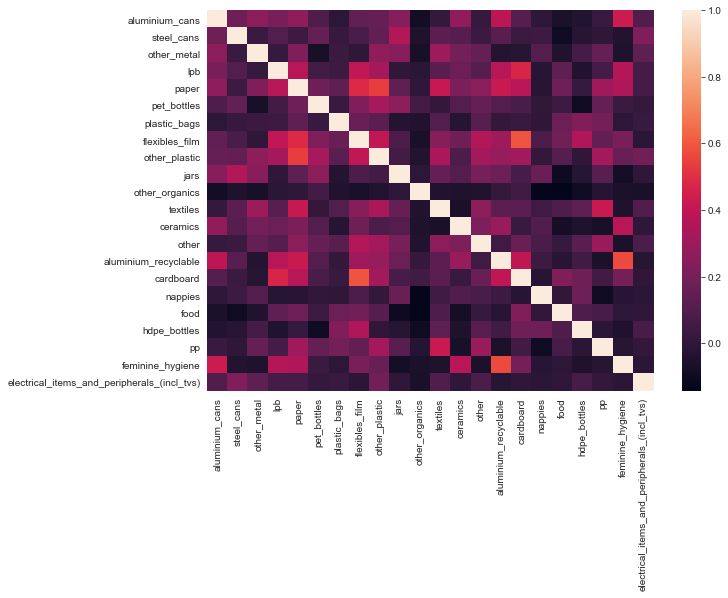

In [414]:
plt.figure(figsize=(10,7))
sns.heatmap(X_train_Scaled.corr());

In [415]:
X_train_Scaled.columns

Index(['aluminium_cans', 'steel_cans', 'other_metal', 'lpb', 'paper', 'pet_bottles', 'plastic_bags', 'flexibles_film', 'other_plastic', 'jars', 'other_organics', 'textiles', 'ceramics', 'other', 'aluminium_recyclable', 'cardboard', 'nappies', 'food', 'hdpe_bottles', 'pp', 'feminine_hygiene', 'electrical_items_and_peripherals_(incl_tvs)'], dtype='object')

## Statsmodel OLS

In [416]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

X_int = sm.tools.add_constant(X)
model = OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_energy_kWh   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1743.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          2.91e-159
Time:                        19:22:15   Log-Likelihood:                -254.33
No. Observations:                 163   AIC:                             554.7
Df Residuals:                     140   BIC:                             625.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.3511      0.170     -2.061      0.041      -0.688      -0.014
aluminium_cans                                  1.9143      1.533      1.249      0.214      -1.116       4.945
steel_cans                                     -0.1379      0.143     -0.966      0.336      -0.420       0.144
other_metal                                    -0.3126      0.291     -1.073      0.285      -0.889       0.263
lpb                                             0.3106      0.691      0.449      0.654      -1.056       1.678
paper                                           1.2241      0.535      2.286      0.024       0.166       2.283
pet_bottles                                     0.4985      0.239      2.088      0.039       0.027       0.970
plastic_bags                                    1.2671      0.664      1.908      0.058      -0.046       2.580
flexibles_film                                  1.4368      0.397      3.616      0.000       0.651       2.222
other_plastic                                   1.5495      0.508      3.053      0.003       0.546       2.553
jars                                           -0.3529      0.346     -1.020      0.310      -1.037       0.331
other_organics                                  3.3356      0.033    101.704      0.000       3.271       3.400
textiles                                        0.6091      0.232      2.625      0.010       0.150       1.068
ceramics                                       -0.0256      0.967     -0.026      0.979      -1.937       1.886
other                                          -0.4896      0.428     -1.143      0.255      -1.337       0.357
aluminium_recyclable                            2.0410      2.766      0.738      0.462      -3.429       7.511
cardboard                                       1.2990      0.367      3.538      0.001       0.573       2.025
nappies                                         3.3205      0.026    126.336      0.000       3.269       3.373
food                                            3.3852      0.032    106.267      0.000       3.322       3.448
hdpe_bottles                                    2.8529      0.984      2.900      0.004       0.908       4.798
pp                                             -0.5939      3.391     -0.175      0.861      -7.298       6.111
feminine_hygiene                                0.1249      1.485      0.084      0.933      -2.810       3.060
electrical_items_and_peripherals_(incl_tvs)    -0.0787      0.946     -0.083      0.934      -1.950       1.793
==============================================================================
Omnibus:                       33.627   Durbin-Watson:                   1.885
Prob(Omnibus)

In [417]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

X_int = sm.tools.add_constant(X)
model = OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_energy_kWh   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1743.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):          2.91e-159
Time:                        19:22:15   Log-Likelihood:                -254.33
No. Observations:                 163   AIC:                             554.7
Df Residuals:                     140   BIC:                             625.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.3511      0.170     -2.061      0.041      -0.688      -0.014
aluminium_cans                                  1.9143      1.533      1.249      0.214      -1.116       4.945
steel_cans                                     -0.1379      0.143     -0.966      0.336      -0.420       0.144
other_metal                                    -0.3126      0.291     -1.073      0.285      -0.889       0.263
lpb                                             0.3106      0.691      0.449      0.654      -1.056       1.678
paper                                           1.2241      0.535      2.286      0.024       0.166       2.283
pet_bottles                                     0.4985      0.239      2.088      0.039       0.027       0.970
plastic_bags                                    1.2671      0.664      1.908      0.058      -0.046       2.580
flexibles_film                                  1.4368      0.397      3.616      0.000       0.651       2.222
other_plastic                                   1.5495      0.508      3.053      0.003       0.546       2.553
jars                                           -0.3529      0.346     -1.020      0.310      -1.037       0.331
other_organics                                  3.3356      0.033    101.704      0.000       3.271       3.400
textiles                                        0.6091      0.232      2.625      0.010       0.150       1.068
ceramics                                       -0.0256      0.967     -0.026      0.979      -1.937       1.886
other                                          -0.4896      0.428     -1.143      0.255      -1.337       0.357
aluminium_recyclable                            2.0410      2.766      0.738      0.462      -3.429       7.511
cardboard                                       1.2990      0.367      3.538      0.001       0.573       2.025
nappies                                         3.3205      0.026    126.336      0.000       3.269       3.373
food                                            3.3852      0.032    106.267      0.000       3.322       3.448
hdpe_bottles                                    2.8529      0.984      2.900      0.004       0.908       4.798
pp                                             -0.5939      3.391     -0.175      0.861      -7.298       6.111
feminine_hygiene                                0.1249      1.485      0.084      0.933      -2.810       3.060
electrical_items_and_peripherals_(incl_tvs)    -0.0787      0.946     -0.083      0.934      -1.950       1.793
==============================================================================
Omnibus:                       33.627   Durbin-Watson:                   1.885
Prob(Omnibus)

In [418]:
# from statsmodels.regression.linear_model import OLS
# import statsmodels.api as sm
# import statsmodels.stats.api as sms
# import statsmodels.formula.api as smf
# import scipy.stats as stats
# plt.style.use('ggplot')

# X_int = sm.tools.add_constant(X)
# model = OLS(y, X_int).fit()
# model.summary()

In [419]:
# #
# results = []
# print('Model Residuals Plot')
# print('--------------------')
# fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
# plt.show()
# for idx, column in enumerate(X.columns):
#     print(f'Belize MSW Regression Plot for {column} Feature')
#     print('------------------------------------------------')
    
#     fig, axes = plt.subplots(figsize=(15,12))
#     fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
#     fig.tight_layout()
#     plt.show()
    
#     input('Press ENTER to continue...')

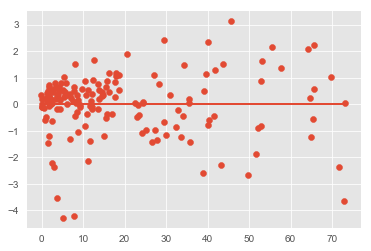

In [420]:
# Plot redisuals from Statsmodel OLS
plt.scatter(model.predict(X_int), model.resid)
plt.plot(model.predict(X_int), [0 for i in range(len(X_int))]);

## Scikit Learn LinearRegression Model

In [421]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_Scaled, y_train_Scaled)

y_hat_train_scaled = linreg.predict(X_train_Scaled)
y_hat_test_scaled = linreg.predict(X_test_Scaled)

train_residuals = scaler.inverse_transform(y_hat_train_scaled) - y_train
test_residuals = scaler.inverse_transform(y_hat_test_scaled) - y_test

train_mse = mean_squared_error(y_train, scaler.inverse_transform(y_hat_train_scaled))
test_mse = mean_squared_error(y_test, scaler.inverse_transform(y_hat_test_scaled))

print('Train RMSE:', np.sqrt(train_mse))
print('------------------------------')
print('Test RMSE:', np.sqrt(test_mse))
linreg.score(X_test_Scaled, y_test_Scaled)

Train RMSE: 1.1415077945008758
------------------------------
Test RMSE: 1.4527413561835145


0.9964194998853981

Sklearn Model Intercept: [-9.26220732e-17]


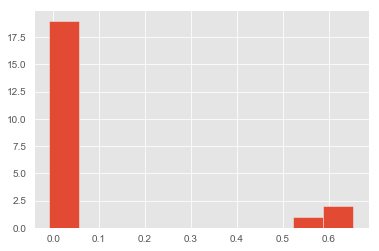

In [422]:
sklearn_results = pd.DataFrame()
sklearn_results['Item'] = [x for x in X_train_Scaled.columns]
sklearn_results['Coef'] = [x for x in linreg.coef_[0]]
print('Sklearn Model Intercept:', linreg.intercept_)
sklearn_results['Coef'].hist();

## Decision Tree Regressor

### Baseline Model

In [423]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_Scaled, y_train_Scaled)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [424]:
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_test_Scaled)
y_pred = scaler.inverse_transform(y_pred)

print('RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-sq Score:', r2_score(y_test, y_pred))

RMSE Score: 12.971503151138652
R-sq Score: 0.71453839529882


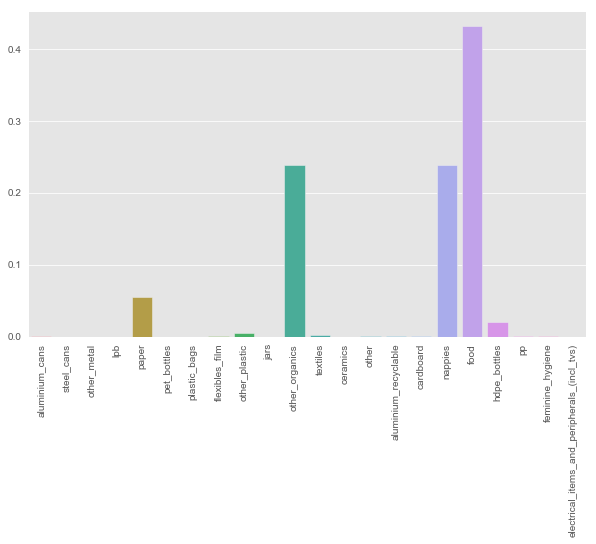

In [425]:
plt.figure(figsize=(10,6))
sns.barplot(X_train_Scaled.columns, regressor.feature_importances_, orient="v");
plt.xticks(rotation=90);

### Optimized Model

In [426]:
op_regressor = DecisionTreeRegressor(random_state=42,
                                     max_depth=4,
                                     min_samples_leaf=2,
                                     min_samples_split=4)
op_regressor.fit(X_train_Scaled, y_train_Scaled)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [427]:
y_pred = op_regressor.predict(X_test_Scaled)
y_pred = scaler.inverse_transform(y_pred)

print('RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-sq Score:', r2_score(y_test, y_pred))

RMSE Score: 15.607232123258143
R-sq Score: 0.5867442823404876


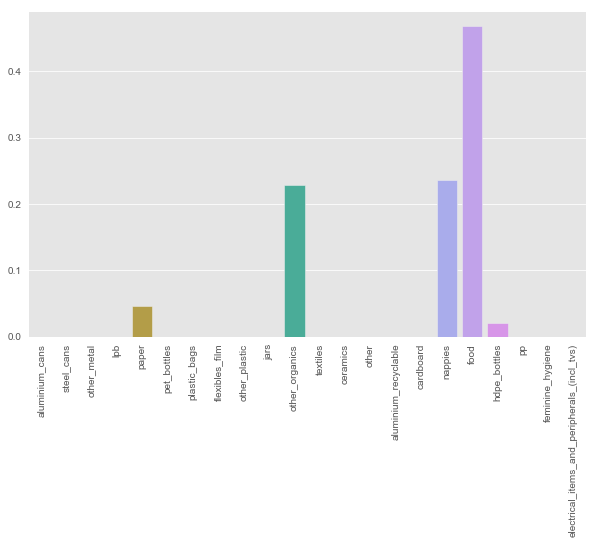

In [428]:
plt.figure(figsize=(10,6))
sns.barplot(X_train_Scaled.columns, op_regressor.feature_importances_, orient="v");
plt.xticks(rotation=90);

## Random Forest Model

In [429]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import pydotplus
from sklearn.pipeline import Pipeline

### Baseline Model

In [430]:
rdm_forest = RandomForestRegressor(200, random_state=42)

In [431]:
rdm_forest.fit(X_train_Scaled, y_train_Scaled)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [432]:
rdm_forest.score(X_train_Scaled, y_train_Scaled)

0.9827739646056629

In [433]:
rdm_forest.score(X_test_Scaled, y_test_Scaled)

0.859010248677001

In [434]:
y_preds = rdm_forest.predict(X_test_Scaled)
y_preds

array([-0.96700305, -0.65869457,  0.61600284, -0.30258997, -0.82919817,
        2.11264156, -0.71996133,  1.44502559, -0.96933592, -0.95614768,
        0.26436546, -0.71314738,  0.92991779,  1.63147891,  0.47386889,
        0.95188427, -0.29642815, -0.88983129, -0.44487904,  0.7453405 ,
       -0.92086493, -0.92060579,  1.48347044,  1.28254359,  1.61382452])

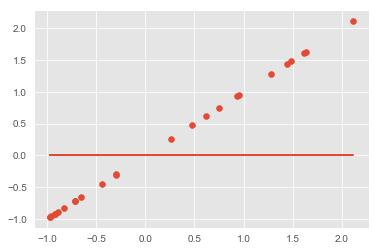

In [435]:
# Plot redisuals from Random Forest
plt.scatter(rdm_forest.predict(X_test_Scaled), y_preds)
plt.plot(rdm_forest.predict(X_test_Scaled), [0 for i in range(len(X_test_Scaled))]);

### GridSearch CV

In [436]:
rf_grid_reg = RandomForestRegressor(random_state=42)
grid_param = [{'n_estimators': [200, 250, 300],
               'max_depth': [15, 17, 20],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2]}]

In [437]:
# rf_gridsearch = GridSearchCV(rf_grid_reg, grid_param, cv=3)
# rf_gridsearch.fit(X_train_Scaled, y_train_Scaled)

In [438]:
# rf_gridsearch.best_params_

In [439]:
# rf_gridsearch.score(X_test_Scaled, y_test_Scaled)

In [440]:
optimal_rf_model = RandomForestRegressor(max_depth=17,
                                         min_samples_leaf=1,
                                         min_samples_split=3,
                                         n_estimators=250,
                                         random_state=42)
optimal_rf_model.fit(X_train_Scaled, y_train_Scaled)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

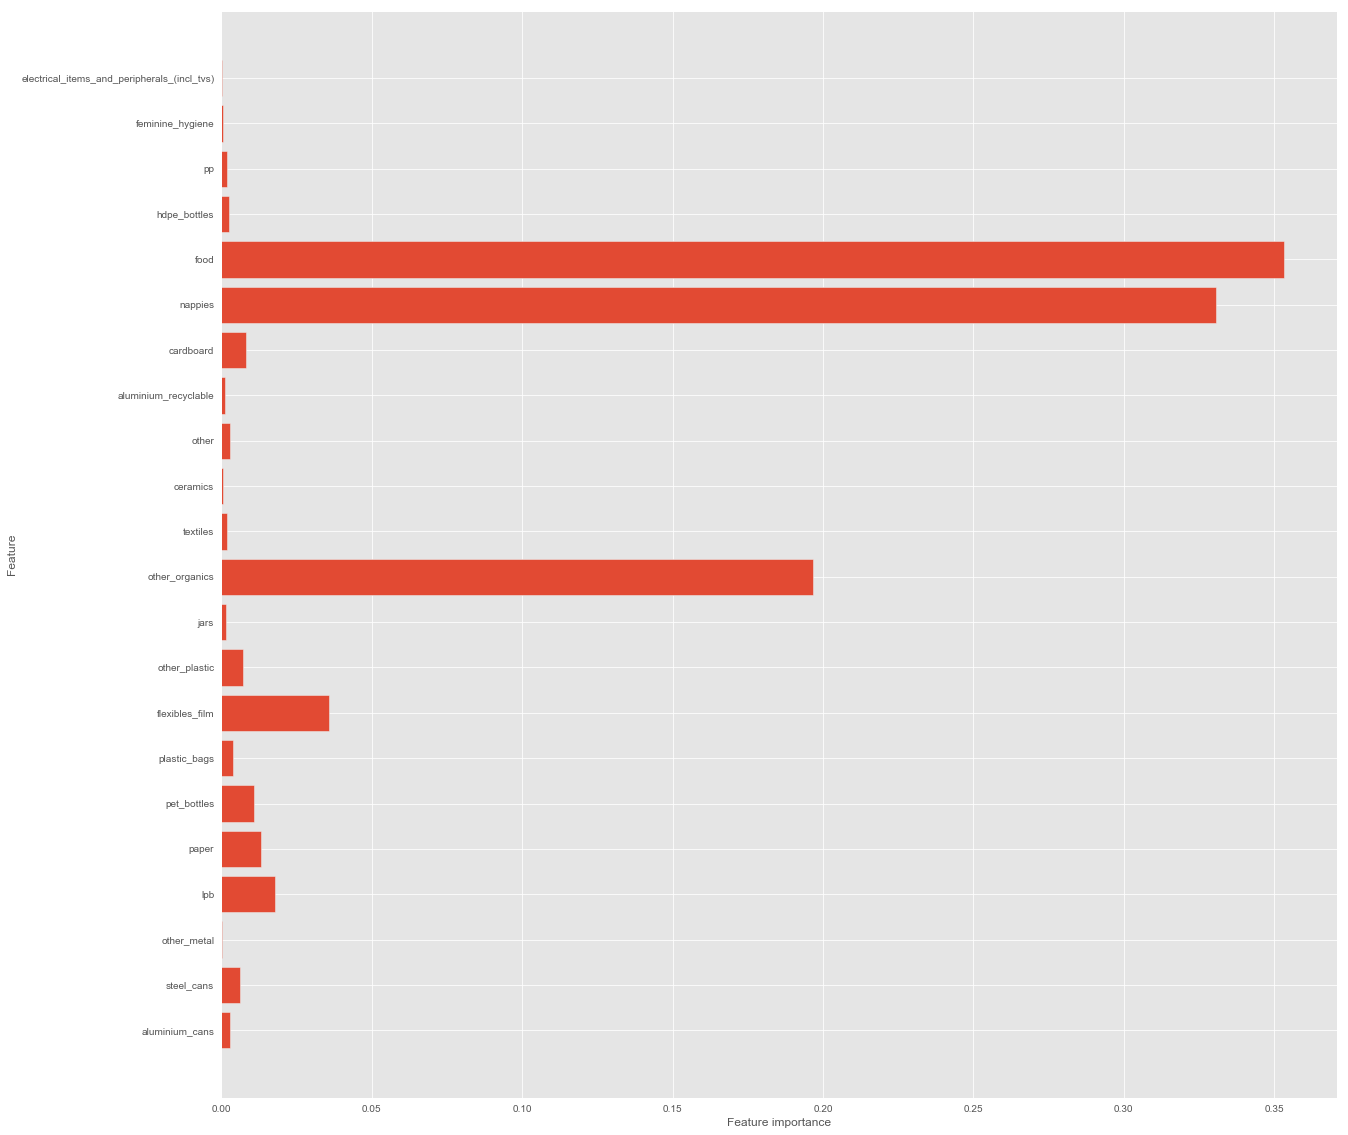

In [441]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(optimal_rf_model)

## MLP Regression Model

In [442]:
from keras import layers, models, optimizers, regularizers
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor

In [443]:
n_features = X_train_Scaled.shape[1]

### Loss, MSE, & R^2 Visualization Function

In [444]:
def coef_determination(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [445]:
#Build vizualization function for training/validation loss and accuracy
def visualize_loss_MSE(results):
    history = results.history
    
    plt.plot(history['loss'], 'b', label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(history['mse'], 'b', label='Training MSE')
    plt.title('Training MSE')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(history['coef_determination'], 'b', label='Training R^2')
    plt.title('Training R^2')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('R^2', fontsize=12)
    plt.legend(loc='best')
    plt.show()

### Baseline Model

In [446]:
baseline_model = Sequential()

baseline_model.add(layers.Dense(10, activation='relu', input_shape=(n_features, )))

baseline_model.add(layers.Dense(5, activation='relu'))

baseline_model.add(layers.Dense(1, activation='linear'))

baseline_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [447]:
baseline_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 798us/step - loss: 1.2499 - mse: 1.2499 - coef_determination: -0.2181
Epoch 2/150
5/5 [==============================] - 0s 596us/step - loss: 1.0352 - mse: 1.0352 - coef_determination: -0.0925
Epoch 3/150
5/5 [==============================] - 0s 599us/step - loss: 0.9305 - mse: 0.9305 - coef_determination: 0.1377
Epoch 4/150
5/5 [==============================] - 0s 611us/step - loss: 0.8513 - mse: 0.8513 - coef_determination: 0.1126
Epoch 5/150
5/5 [==============================] - 0s 602us/step - loss: 0.7825 - mse: 0.7825 - coef_determination: 0.2320
Epoch 6/150
5/5 [==============================] - 0s 805us/step - loss: 0.7174 - mse: 0.7174 - coef_determination: 0.2175
Epoch 7/150
5/5 [==============================] - 0s 799us/step - loss: 0.6508 - mse: 0.6508 - coef_determination: 0.0991
Epoch 8/150
5/5 [==============================] - 0s 594us/step - loss: 0.5991 - mse: 0.5991 - coef_determination: 0.3970
Epoch 9/150
5/

5/5 [==============================] - 0s 798us/step - loss: 0.0254 - mse: 0.0254 - coef_determination: 0.9720
Epoch 133/150
5/5 [==============================] - 0s 798us/step - loss: 0.0251 - mse: 0.0251 - coef_determination: 0.9725
Epoch 134/150
5/5 [==============================] - 0s 598us/step - loss: 0.0250 - mse: 0.0250 - coef_determination: 0.9738
Epoch 135/150
5/5 [==============================] - 0s 598us/step - loss: 0.0248 - mse: 0.0248 - coef_determination: 0.9681
Epoch 136/150
5/5 [==============================] - 0s 807us/step - loss: 0.0248 - mse: 0.0248 - coef_determination: 0.9763
Epoch 137/150
5/5 [==============================] - 0s 606us/step - loss: 0.0246 - mse: 0.0246 - coef_determination: 0.9745
Epoch 138/150
5/5 [==============================] - 0s 798us/step - loss: 0.0244 - mse: 0.0244 - coef_determination: 0.9707
Epoch 139/150
5/5 [==============================] - 0s 798us/step - loss: 0.0242 - mse: 0.0242 - coef_determination: 0.9725
Epoch 140/150


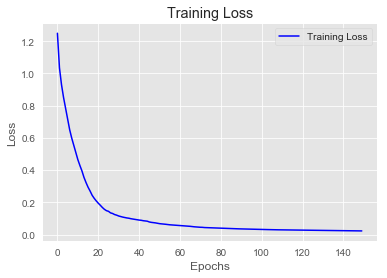

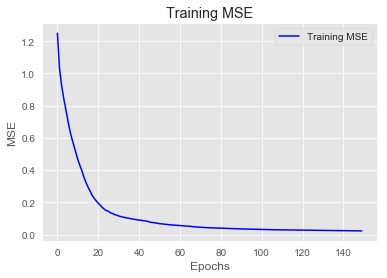

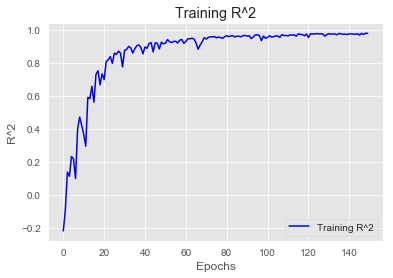

In [448]:
visualize_loss_MSE(baseline_model.history)

In [449]:
baseline_preds_scaled = baseline_model.predict(X_test_Scaled)
baseline_preds = scaler.inverse_transform(baseline_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))

print('RMSE:', rmse)
print('-------------------------')
print(baseline_model.summary())

RMSE: 4.020871998071345
-------------------------
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                230       
_________________________________________________________________
dense_37 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 6         
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
None


### Overfit Model

In [450]:
overfit_model = Sequential()

overfit_model.add(layers.Dense(10, activation='relu', input_shape=(n_features, )))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(1, activation='linear'))

overfit_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [451]:
overfit_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150,
                  batch_size=10)

Epoch 1/150
14/14 [==============================] - 0s 640us/step - loss: 0.9565 - mse: 0.9565 - coef_determination: -0.1927
Epoch 2/150
14/14 [==============================] - 0s 639us/step - loss: 0.8317 - mse: 0.8317 - coef_determination: 0.1598
Epoch 3/150
14/14 [==============================] - 0s 640us/step - loss: 0.7581 - mse: 0.7581 - coef_determination: -0.1019
Epoch 4/150
14/14 [==============================] - 0s 641us/step - loss: 0.6747 - mse: 0.6747 - coef_determination: 0.0499
Epoch 5/150
14/14 [==============================] - 0s 641us/step - loss: 0.6095 - mse: 0.6095 - coef_determination: 0.3412
Epoch 6/150
14/14 [==============================] - 0s 641us/step - loss: 0.5374 - mse: 0.5374 - coef_determination: 0.4124
Epoch 7/150
14/14 [==============================] - 0s 641us/step - loss: 0.4901 - mse: 0.4901 - coef_determination: 0.2703
Epoch 8/150
14/14 [==============================] - 0s 713us/step - loss: 0.4429 - mse: 0.4429 - coef_determination: 0.470

14/14 [==============================] - 0s 570us/step - loss: 0.0121 - mse: 0.0121 - coef_determination: 0.9834
Epoch 130/150
14/14 [==============================] - 0s 641us/step - loss: 0.0120 - mse: 0.0120 - coef_determination: 0.9843
Epoch 131/150
14/14 [==============================] - 0s 641us/step - loss: 0.0121 - mse: 0.0121 - coef_determination: 0.9795
Epoch 132/150
14/14 [==============================] - 0s 640us/step - loss: 0.0117 - mse: 0.0117 - coef_determination: 0.9829
Epoch 133/150
14/14 [==============================] - 0s 570us/step - loss: 0.0117 - mse: 0.0117 - coef_determination: 0.9844
Epoch 134/150
14/14 [==============================] - 0s 570us/step - loss: 0.0113 - mse: 0.0113 - coef_determination: 0.9852
Epoch 135/150
14/14 [==============================] - 0s 570us/step - loss: 0.0111 - mse: 0.0111 - coef_determination: 0.9836
Epoch 136/150
14/14 [==============================] - 0s 570us/step - loss: 0.0111 - mse: 0.0111 - coef_determination: 0.974

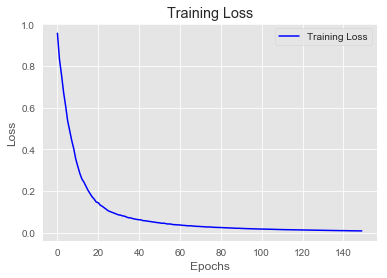

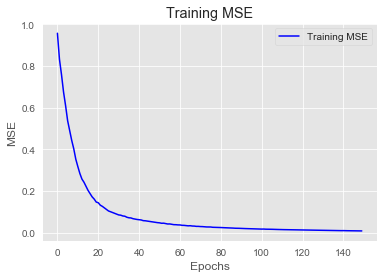

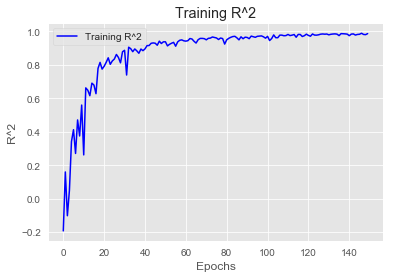

In [452]:
visualize_loss_MSE(overfit_model.history)

In [453]:
overfit_preds_scaled = overfit_model.predict(X_test_Scaled)
overfit_preds = scaler.inverse_transform(overfit_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, overfit_preds))

print('RMSE:', rmse)
print('-------------------------')
print(overfit_model.summary())

RMSE: 7.767885819958944
-------------------------
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 10)                230       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________
None


### Regularized Model

In [454]:
reg_model = Sequential()

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu', input_shape=(n_features, )))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(1, activation='linear'))

reg_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [455]:
reg_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 795us/step - loss: 1.2860 - mse: 1.0091 - coef_determination: 0.0040
Epoch 2/150
5/5 [==============================] - 0s 796us/step - loss: 1.2699 - mse: 0.9934 - coef_determination: -0.3516
Epoch 3/150
5/5 [==============================] - 0s 598us/step - loss: 1.2522 - mse: 0.9761 - coef_determination: 0.0423
Epoch 4/150
5/5 [==============================] - 0s 589us/step - loss: 1.2467 - mse: 0.9708 - coef_determination: 0.0548
Epoch 5/150
5/5 [==============================] - 0s 787us/step - loss: 1.2417 - mse: 0.9661 - coef_determination: -0.0194
Epoch 6/150
5/5 [==============================] - 0s 798us/step - loss: 1.2335 - mse: 0.9582 - coef_determination: 0.0189
Epoch 7/150
5/5 [==============================] - 0s 997us/step - loss: 1.2325 - mse: 0.9575 - coef_determination: -0.0257
Epoch 8/150
5/5 [==============================] - 0s 997us/step - loss: 1.2239 - mse: 0.9491 - coef_determination: -0.0604
Epoch 9/150


5/5 [==============================] - 0s 798us/step - loss: 0.3864 - mse: 0.1200 - coef_determination: 0.8823
Epoch 68/150
5/5 [==============================] - 0s 798us/step - loss: 0.3829 - mse: 0.1168 - coef_determination: 0.7822
Epoch 69/150
5/5 [==============================] - 0s 798us/step - loss: 0.3767 - mse: 0.1107 - coef_determination: 0.8924
Epoch 70/150
5/5 [==============================] - 0s 798us/step - loss: 0.3743 - mse: 0.1086 - coef_determination: 0.8892
Epoch 71/150
5/5 [==============================] - 0s 799us/step - loss: 0.3707 - mse: 0.1051 - coef_determination: 0.8789
Epoch 72/150
5/5 [==============================] - 0s 798us/step - loss: 0.3711 - mse: 0.1056 - coef_determination: 0.8644
Epoch 73/150
5/5 [==============================] - 0s 997us/step - loss: 0.3652 - mse: 0.1001 - coef_determination: 0.8676
Epoch 74/150
5/5 [==============================] - 0s 798us/step - loss: 0.3645 - mse: 0.0996 - coef_determination: 0.8026
Epoch 75/150
5/5 [===

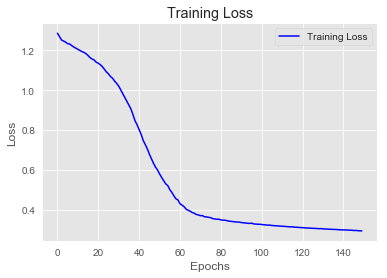

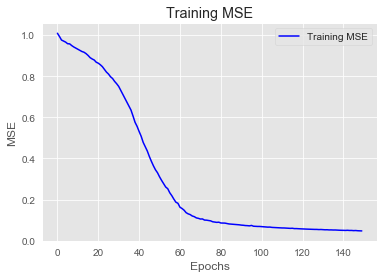

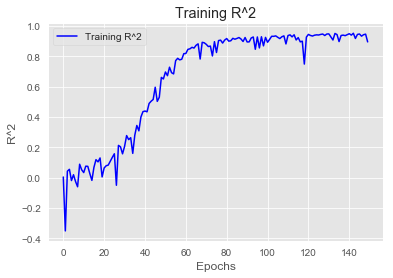

In [456]:
visualize_loss_MSE(reg_model.history)

In [457]:
reg_preds_scaled = reg_model.predict(X_test_Scaled)
reg_preds = scaler.inverse_transform(reg_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, reg_preds))

print('RMSE:', rmse)
print('-------------------------')
print(reg_model.summary())

RMSE: 7.312038577608482
-------------------------
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 10)                230       
_________________________________________________________________
dense_45 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_46 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_47 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_48 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 11        
Total params: 681
Trainable params: 681
Non-trainable params: 0
_____

### Optimized Model

In [458]:
optimized_model = Sequential()

optimized_model.add(layers.Dense(40,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu', input_shape=(n_features, )))

optimized_model.add(layers.Dense(20,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

optimized_model.add(layers.Dense(5,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

optimized_model.add(layers.Dense(1, activation='linear'))

optimized_model.compile(optimizer='RMSprop',
              loss='mse',
              metrics=['mse', coef_determination])

In [459]:
optimized_model.fit(X_train_Scaled,
                     y_train_Scaled,
                     epochs=150,
                     batch_size=20)

Epoch 1/150
7/7 [==============================] - 0s 855us/step - loss: 1.5117 - mse: 1.1902 - coef_determination: -0.2599
Epoch 2/150
7/7 [==============================] - 0s 713us/step - loss: 1.2389 - mse: 0.9203 - coef_determination: 0.0440
Epoch 3/150
7/7 [==============================] - 0s 712us/step - loss: 1.0927 - mse: 0.7758 - coef_determination: 0.1895
Epoch 4/150
7/7 [==============================] - 0s 712us/step - loss: 0.9790 - mse: 0.6635 - coef_determination: 0.2756
Epoch 5/150
7/7 [==============================] - 0s 996us/step - loss: 0.8910 - mse: 0.5768 - coef_determination: 0.3513
Epoch 6/150
7/7 [==============================] - 0s 856us/step - loss: 0.8148 - mse: 0.5017 - coef_determination: 0.4824
Epoch 7/150
7/7 [==============================] - 0s 723us/step - loss: 0.7525 - mse: 0.4407 - coef_determination: 0.4011
Epoch 8/150
7/7 [==============================] - 0s 855us/step - loss: 0.6911 - mse: 0.3805 - coef_determination: 0.5874
Epoch 9/150
7/7

7/7 [==============================] - 0s 712us/step - loss: 0.0417 - mse: 0.0018 - coef_determination: 0.9977
Epoch 133/150
7/7 [==============================] - 0s 711us/step - loss: 0.0419 - mse: 0.0025 - coef_determination: 0.9970
Epoch 134/150
7/7 [==============================] - 0s 855us/step - loss: 0.0422 - mse: 0.0031 - coef_determination: 0.9967
Epoch 135/150
7/7 [==============================] - 0s 712us/step - loss: 0.0423 - mse: 0.0037 - coef_determination: 0.9944
Epoch 136/150
7/7 [==============================] - 0s 712us/step - loss: 0.0410 - mse: 0.0026 - coef_determination: 0.9963
Epoch 137/150
7/7 [==============================] - 0s 855us/step - loss: 0.0403 - mse: 0.0023 - coef_determination: 0.9972
Epoch 138/150
7/7 [==============================] - 0s 713us/step - loss: 0.0403 - mse: 0.0026 - coef_determination: 0.9967
Epoch 139/150
7/7 [==============================] - 0s 710us/step - loss: 0.0394 - mse: 0.0020 - coef_determination: 0.9976
Epoch 140/150


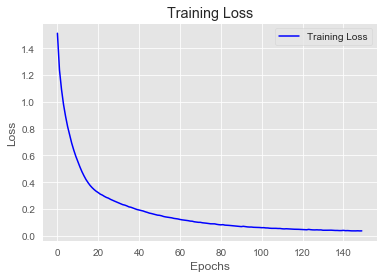

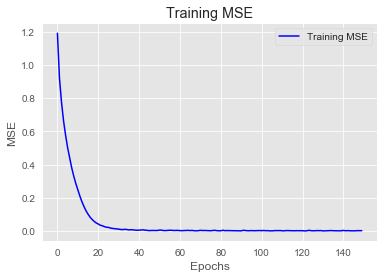

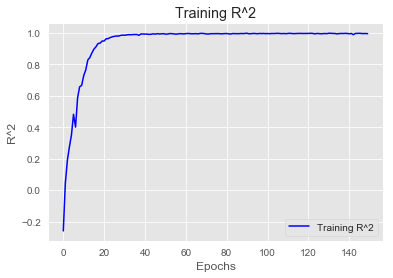

In [460]:
visualize_loss_MSE(optimized_model.history)

In [461]:
op_preds_scaled = optimized_model.predict(X_test_Scaled)
op_preds = scaler.inverse_transform(op_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, op_preds))

print('RMSE:', rmse)
print('-------------------------')
print(optimized_model.summary())

RMSE: 3.5345046840005763
-------------------------
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 40)                920       
_________________________________________________________________
dense_51 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_52 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 6         
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
None
